# Prediction of house price
We need to predict the house price bassed on the data set we have

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

# Reading all files 
We load the train and test files. We should train our model based on 'train.csv' file and predict the house price based on 'test.csv' file.

In [2]:
train_filepath = './house-prices-advanced-regression-techniques/train.csv'
train_data = pd.read_csv(train_filepath)

test_filepath = './house-prices-advanced-regression-techniques/test.csv'
test_data = pd.read_csv(test_filepath)

#list of all columns
columns_list=train_data.columns.tolist()
print('The list of all columns:')
print(columns_list)

train_data.head()


The list of all columns:
['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPor

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

# Cleaning and categorizaing the data 
Here we 
- Remove all NAN values from numeric columns
- Type correction of columns: Although some column's types are numberic but by mistake they are categorized by string. 
- Finding the string columns and categorized them by discrete numbers. 
- Replacing the price with Log(price)

In [3]:
#drop NAN values from numeric
train_data= train_data[train_data.select_dtypes( np.number).notna().any(axis=1)].fillna('nan') 




#which columns are string
list_col=[]
for columns_select in columns_list:
    if (pd.api.types.is_string_dtype(train_data[columns_select])):
        try:
            train_data[columns_select]=train_data[columns_select].astype(float)
            test_data[columns_select]=test_data[columns_select].astype(float)
        except:
            list_col.append(columns_select)

        train_data=train_data[train_data[columns_select].notna()]
list_col_string=list_col
print("The list of string columns:")
print(list_col_string)
list_col_float=train_data.drop(list_col_string, axis=1).columns.tolist()
print("The list of numeric columns:")
print(list_col_float)

#transforms all strings to data
transform_dict = {}
df=train_data[list_col_string]
for col in list_col_string:
    cats = pd.Categorical(df[col]).categories
    d = {}
    for i, cat in enumerate(cats):
        d[cat] = i
    transform_dict[col] = d
transform_dict
test_data =test_data.replace(transform_dict)
#test_data=test_data.astype(float)
train_data=train_data.replace(transform_dict)

try:
    train_data['log_SalePrice']=np.log(train_data['SalePrice'])
    train_data=train_data.drop(columns='SalePrice')
except: 
    a=1
train_data.describe()

The list of string columns:
['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']
The list of numeric columns:
['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', '

Id   MSSubClass     MSZoning  LotFrontage        LotArea  \
count  1121.000000  1121.000000  1121.000000  1121.000000    1121.000000   
mean    726.842105    56.146298     3.029438    70.665477   10122.956289   
std     420.769012    41.772684     0.649195    24.266812    8129.302641   
min       1.000000    20.000000     0.000000    21.000000    1300.000000   
25%     364.000000    20.000000     3.000000    60.000000    7590.000000   
50%     725.000000    50.000000     3.000000    70.000000    9416.000000   
75%    1091.000000    70.000000     3.000000    80.000000   11361.000000   
max    1460.000000   190.000000     4.000000   313.000000  215245.000000   

            Street        Alley     LotShape  LandContour  Utilities  ...  \
count  1121.000000  1121.000000  1121.000000  1121.000000     1121.0  ...   
mean      0.996432     1.894737     2.136485     2.782337        0.0  ...   
std       0.059655     0.409245     1.337014     0.707669        0.0  ...   
min       0.000000     0.000000     0.000000     0.000000        0.0  ...   
25%       1.000000     2.000000     0.000000     3.000000        0.0  ...   
50%       1.000000     2.000000     3.000000     3.000000        0.0  ...   
75%       1.000000     2.000000     3.000000     3.000000        0.0  ...   
max       1.000000     2.000000     3.000000     3.000000        0.0  ...   

          PoolArea       PoolQC        Fence  MiscFeature      MiscVal  \
count  1121.000000  1121.000000  1121.000000  1121.000000  1121.000000   
mean      2.934880     2.989295     3.506690     2.935772    23.429081   
std      40.222087     0.157751     1.084056     0.355286   165.759816   
min       0.000000     0.000000     0.000000     0.000000     0.000000   
25%       0.000000     3.000000     4.000000     3.000000     0.000000   
50%       0.000000     3.000000     4.000000     3.000000     0.000000   
75%       0.000000     3.000000     4.000000     3.000000     0.000000   
max     648.000000     3.000000     4.000000     3.000000  2500.000000   

            MoSold       YrSold     SaleType  SaleCondition  log_SalePrice  
count  1121.000000  1121.000000  1121.000000    1121.000000    1121.000000  
mean      6.339875  2007.795718     7.479929       3.818020      12.048412  
std       2.687854     1.335043     1.556036       1.069411       0.396778  
min       1.000000  2006.000000     0.000000       0.000000      10.471950  
25%       5.000000  2007.000000     8.000000       4.000000      11.782953  
50%       6.000000  2008.000000     8.000000       4.000000      12.013095  
75%       8.000000  2009.000000     8.000000       4.000000      12.299108  
max      12.000000  2010.000000     8.000000       5.000000      13.534473  

[8 rows x 81 columns]

In [4]:
train_data.head()


Id  MSSubClass  MSZoning  LotFrontage  LotArea  Street  Alley  LotShape  \
0   1          60         3         65.0     8450       1      2         3   
1   2          20         3         80.0     9600       1      2         3   
2   3          60         3         68.0    11250       1      2         0   
3   4          70         3         60.0     9550       1      2         0   
4   5          60         3         84.0    14260       1      2         0   

   LandContour  Utilities  ...  PoolArea  PoolQC  Fence  MiscFeature  MiscVal  \
0            3          0  ...         0       3      4            3        0   
1            3          0  ...         0       3      4            3        0   
2            3          0  ...         0       3      4            3        0   
3            3          0  ...         0       3      4            3        0   
4            3          0  ...         0       3      4            3        0   

   MoSold  YrSold  SaleType  SaleCondition  log_SalePrice  
0       2    2008         8              4      12.247694  
1       5    2007         8              4      12.109011  
2       9    2008         8              4      12.317167  
3       2    2006         8              0      11.849398  
4      12    2008         8              4      12.429216  

[5 rows x 81 columns]

# Correlation matrix
To find the correlation funtion between the columns we use correlation matrix. The aim is to find the correlation funtion of the price to other parameters.


In [5]:
#find some correlations
correlation_matrix=train_data.corr( method='pearson')
correlation_matrix

Id  MSSubClass  MSZoning  LotFrontage   LotArea  \
Id             1.000000    0.021937 -0.004523    -0.013289 -0.040711   
MSSubClass     0.021937    1.000000  0.028551    -0.386940 -0.198096   
MSZoning      -0.004523    0.028551  1.000000    -0.096176 -0.034969   
LotFrontage   -0.013289   -0.386940 -0.096176     1.000000  0.421184   
LotArea       -0.040711   -0.198096 -0.034969     0.421184  1.000000   
...                 ...         ...       ...          ...       ...   
MoSold        -0.000570   -0.027170 -0.020578     0.018815  0.008998   
YrSold         0.013407   -0.012448 -0.027051     0.013267 -0.006904   
SaleType       0.017500   -0.009433  0.109743    -0.027619  0.012071   
SaleCondition  0.013248   -0.023208 -0.001279     0.051634  0.057052   
log_SalePrice -0.041112   -0.083768 -0.192314     0.353611  0.281850   

                 Street     Alley  LotShape  LandContour  Utilities  ...  \
Id            -0.007314 -0.007485  0.019747    -0.011876        NaN  ...   
MSSubClass     0.023141 -0.104704  0.086401     0.008146        NaN  ...   
MSZoning       0.117989 -0.032015  0.055029    -0.021023        NaN  ...   
LotFrontage   -0.039065  0.149740 -0.165082    -0.074173        NaN  ...   
LotArea       -0.054912  0.059171 -0.162840    -0.132897        NaN  ...   
...                 ...       ...       ...          ...        ...  ...   
MoSold         0.007570  0.023625 -0.056150     0.017335        NaN  ...   
YrSold        -0.042794  0.030878  0.052650     0.009597        NaN  ...   
SaleType       0.028084  0.017711 -0.010913    -0.039648        NaN  ...   
SaleCondition  0.017804  0.062277 -0.081277     0.014862        NaN  ...   
log_SalePrice  0.083477  0.165520 -0.347097     0.026395        NaN  ...   

               PoolArea    PoolQC     Fence  MiscFeature   MiscVal    MoSold  \
Id             0.048010 -0.030762 -0.016952    -0.012031  0.045799 -0.000570   
MSSubClass     0.003166 -0.004233  0.065340     0.069337 -0.040689 -0.027170   
MSZoning      -0.003312  0.003080 -0.085917     0.008205  0.014975 -0.020578   
LotFrontage    0.211746 -0.200354 -0.036146    -0.004358  0.001471  0.018815   
LotArea        0.109147 -0.089871  0.027419    -0.005666  0.012790  0.008998   
...                 ...       ...       ...          ...       ...       ...   
MoSold        -0.054872  0.046492  0.003662    -0.025739  0.020067  1.000000   
YrSold        -0.053888  0.061679 -0.028976    -0.040863  0.034106 -0.150577   
SaleType       0.010714 -0.015426 -0.044779     0.023507  0.001589 -0.046080   
SaleCondition -0.066201  0.110171  0.077298     0.035008  0.002979  0.056948   
log_SalePrice  0.066292 -0.088267  0.157239     0.107879 -0.034839  0.061014   

                 YrSold  SaleType  SaleCondition  log_SalePrice  
Id             0.013407  0.017500       0.013248      -0.041112  
MSSubClass    -0.012448 -0.009433      -0.023208      -0.083768  
MSZoning      -0.027051  0.109743      -0.001279      -0.192314  
LotFrontage    0.013267 -0.027619       0.051634       0.353611  
LotArea       -0.006904  0.012071       0.057052       0.281850  
...                 ...       ...            ...            ...  
MoSold        -0.150577 -0.046080       0.056948       0.061014  
YrSold         1.000000  0.029615      -0.015430      -0.023061  
SaleType       0.029615  1.000000       0.137308      -0.041858  
SaleCondition -0.015430  0.137308       1.000000       0.268353  
log_SalePrice -0.023061 -0.041858       0.268353       1.000000  

[81 rows x 81 columns]

# Selecting the best parameters to fit
If the absolute value of the correlation funtion between a column and the price is higher, we can select it for the prediction. For an example we select the |Abs(corr)|>0.6 and plot the best columns.

In [6]:

best_parameters=correlation_matrix.index[abs(correlation_matrix['log_SalePrice'])>0.6]
best_parameters=best_parameters.tolist()
del best_parameters[-1]
print('Number of the best parameters to fit= ',np.shape(best_parameters)[0])
print('List of the best parameters to fit:')
print(best_parameters)

Number of the best parameters to fit=  10
List of the best parameters to fit:
['OverallQual', 'ExterQual', 'BsmtQual', 'TotalBsmtSF', '1stFlrSF', 'GrLivArea', 'FullBath', 'KitchenQual', 'GarageCars', 'GarageArea']


# Colormap of the best parameters

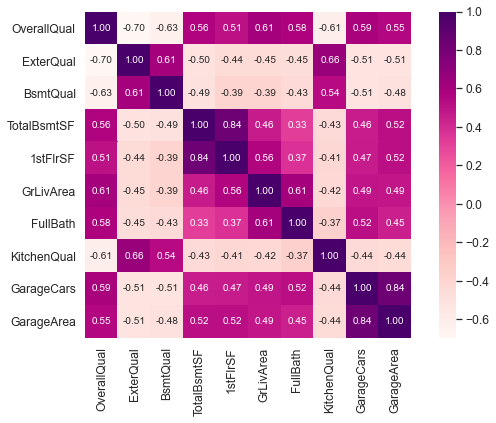

In [7]:

import seaborn as sns
import matplotlib.pyplot as plt
corrmatrix = train_data.corr()
plt.figure(figsize = (10,6))
columnss = best_parameters
cm = np.corrcoef(train_data[best_parameters].values.T)
sns.set(font_scale = 1.1)
hm = sns.heatmap(cm, cbar = True, annot = True, square = True, cmap = "RdPu" ,  fmt = ".2f", annot_kws = {"size": 10},
                 yticklabels = best_parameters, xticklabels =best_parameters)
plt.show()


# Ploting the price vs. selected parameters

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB o

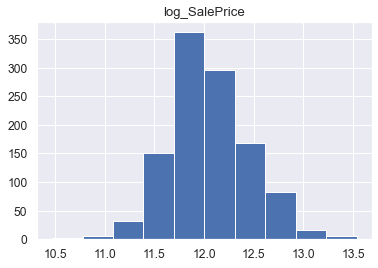

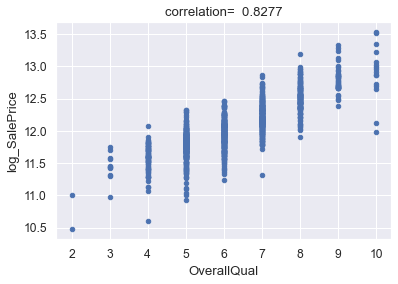

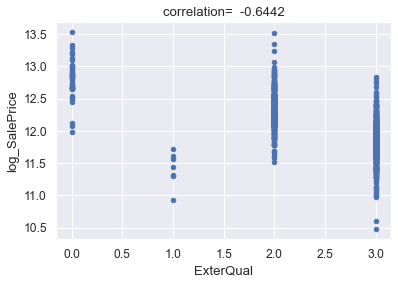

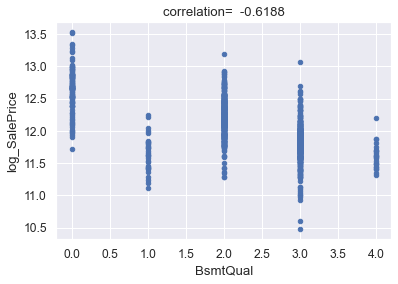

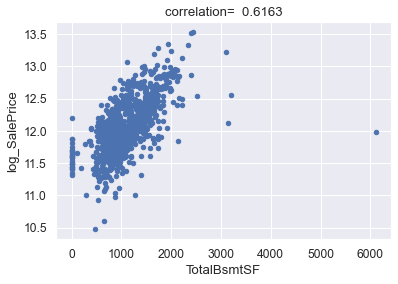

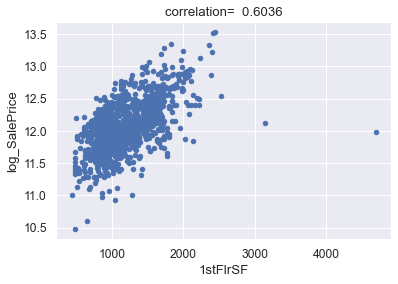

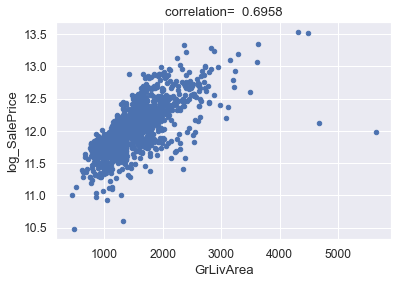

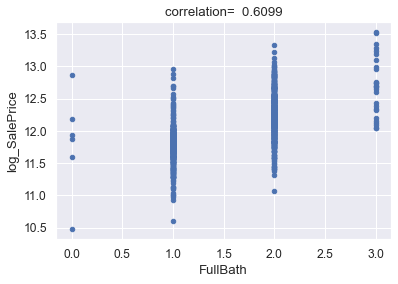

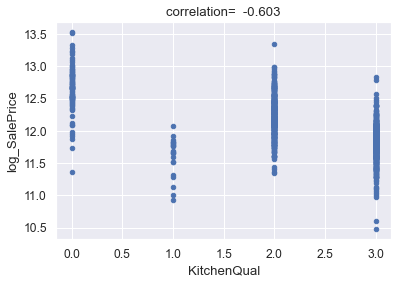

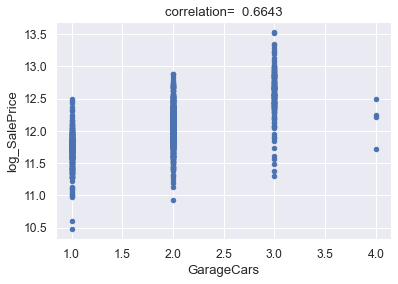

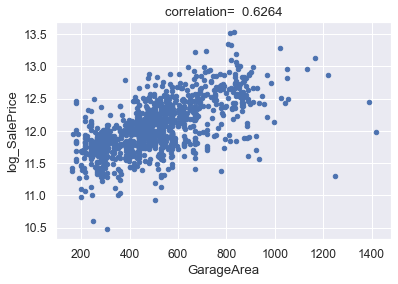

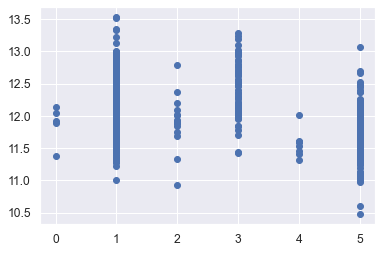

In [8]:
train_data.filter(items=['log_SalePrice']).hist()

for parameters in best_parameters:
    title_cor='correlation=  {:2.4}'.format( correlation_matrix.loc[parameters,'log_SalePrice'])
    train_data.plot.scatter(x=parameters, y='log_SalePrice',title=title_cor )


#*****************************************
import matplotlib.pyplot as plt
import numpy as np


fig, ax = plt.subplots()
plt.scatter(train_data['GarageType'],train_data['log_SalePrice'])

# Training the model to predict
Here we use scikit-learn to train the model to predicting the price based on the input data.
Here we
- Calculate the best parameter using the correlation funtion>cor_ceo =0.0376
- Train the model using RandomForestRegressor

In [9]:
from sklearn.datasets import load_iris
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

cor_ceo =0.0376
#select best fitting parameters
best_parameters=correlation_matrix.index[abs(correlation_matrix['log_SalePrice'])>cor_ceo]
best_parameters=best_parameters.tolist()
del best_parameters[-1]
features =best_parameters

#start to train
X = train_data[features].astype(float)
X = X.drop('Id',axis=1, errors='ignore')
y = train_data['log_SalePrice']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf_model_on_full_data = RandomForestRegressor()
rf_model_on_full_data.fit(X_train,y_train)


RandomForestRegressor()

# Calculating the mean squared error

In [10]:
test_preds_log = rf_model_on_full_data.predict(X_test)
test_preds=np.exp(test_preds_log)
#test mean_squared_error
from sklearn.metrics import mean_squared_error

mean_squared_error(test_preds_log,y_test)


0.01711407486706451